In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
#Ver el dataframe
df = pd.read_csv('energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
#Datos nulos y duplicados
print('Valores nulos')
print(df.isnull().sum())
print('\nValores duplicados')
print(df.duplicated().sum())

Valores nulos
date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

Valores duplicados
0


No hay valores nulos ni duplicados en el dataframe

In [5]:
#Eliminación de columnas irrelevantes
columnas_irrelevantes = ["rv1", "rv2", "Tdewpoint", "Visibility", "Windspeed", "RH_out", "Press_mm_hg","date"]
columnas_existentes = [col for col in columnas_irrelevantes if col in df.columns]
df = df.drop(columnas_existentes, axis=1)

print(df.head())
df.to_csv("energydata_complete2.csv", index=False)


   Appliances  lights     T1       RH_1    T2       RH_2     T3       RH_3  \
0          60      30  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1          60      30  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2          50      30  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3          50      40  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4          60      40  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4  ...   RH_5        T6       RH_6         T7  \
0  19.000000  45.566667  ...  55.20  7.026667  84.256667  17.200000   
1  19.000000  45.992500  ...  55.20  6.833333  84.063333  17.200000   
2  18.926667  45.890000  ...  55.09  6.560000  83.156667  17.200000   
3  18.890000  45.723333  ...  55.09  6.433333  83.423333  17.133333   
4  18.890000  45.530000  ...  55.09  6.366667  84.893333  17.200000   

        RH_7    T8       RH_8         T9   RH_9     T_out  
0  41.626667  18.2  48.900000  17.033333  45

In [6]:
#Estandarización de datos atipicos
columnas_a_estandarizar = ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9", "T_out", 
                           "RH_1", "RH_2", "RH_3", "RH_4", "RH_5", "RH_6", "RH_7", "RH_8", "RH_9", 
                           "Appliances", "lights"]

scaler = StandardScaler()
df[columnas_a_estandarizar] = scaler.fit_transform(df[columnas_a_estandarizar])

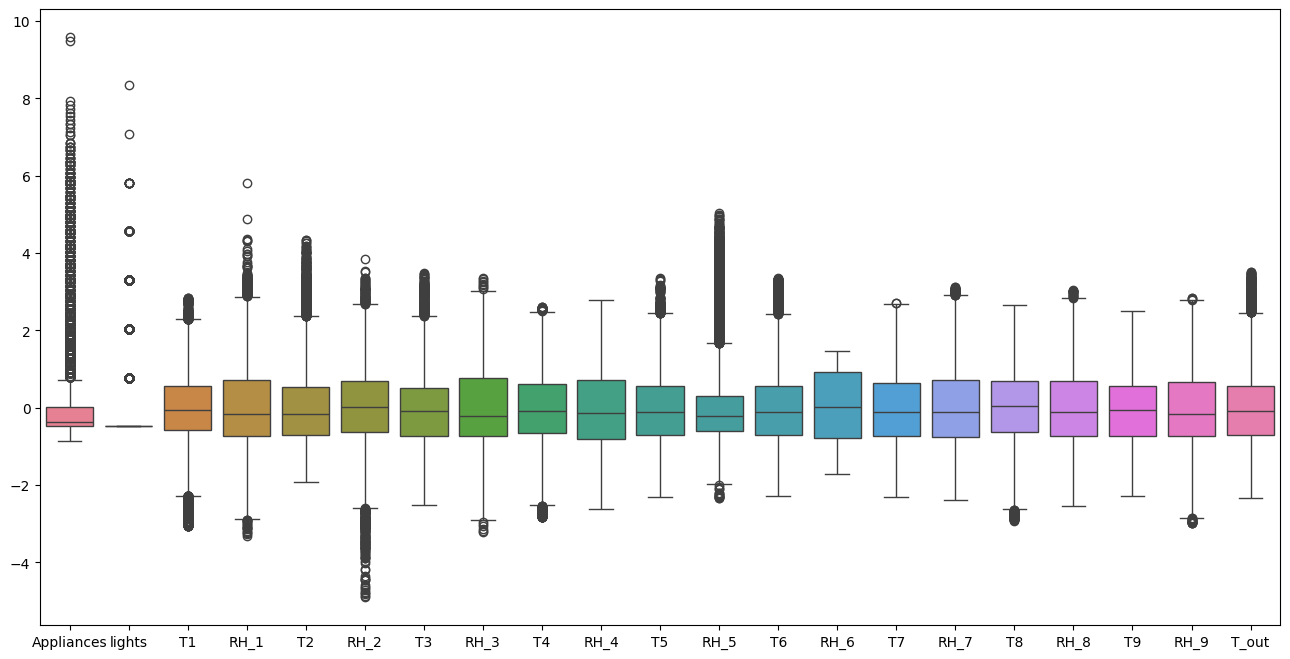

In [7]:
#Visualizar dispersión de los datos 
fig = plt.figure(figsize=(16,8))
sns.boxplot(data=df)
plt.show()

In [8]:
#Normalizar los datos
columnas_a_normalizar = ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9", "T_out", "RH_1", "RH_2", "RH_3", "RH_4", "RH_5", "RH_6", "RH_7", "RH_8", "RH_9", "Appliances", "lights"]

scaler = MinMaxScaler()
df[columnas_a_normalizar] = scaler.fit_transform(df[columnas_a_normalizar])
print(df.head())

df.to_csv("energydata_complete_estandarizado_normalizado.csv", index=False)

   Appliances    lights       T1      RH_1        T2      RH_2        T3  \
0    0.046729  0.428571  0.32735  0.566187  0.225345  0.684038  0.215188   
1    0.046729  0.428571  0.32735  0.541326  0.225345  0.682140  0.215188   
2    0.037383  0.428571  0.32735  0.530502  0.225345  0.679445  0.215188   
3    0.037383  0.571429  0.32735  0.524080  0.225345  0.678414  0.215188   
4    0.046729  0.571429  0.32735  0.531419  0.225345  0.676727  0.215188   

       RH_3        T4      RH_4  ...      RH_5        T6      RH_6        T7  \
0  0.746066  0.351351  0.764262  ...  0.381691  0.381070  0.841827  0.170594   
1  0.748871  0.351351  0.782437  ...  0.381691  0.375443  0.839872  0.170594   
2  0.755569  0.344745  0.778062  ...  0.380037  0.367487  0.830704  0.170594   
3  0.758685  0.341441  0.770949  ...  0.380037  0.363800  0.833401  0.164310   
4  0.758685  0.341441  0.762697  ...  0.380037  0.361859  0.848264  0.170594   

       RH_7        T8      RH_8        T9      RH_9     T_out 

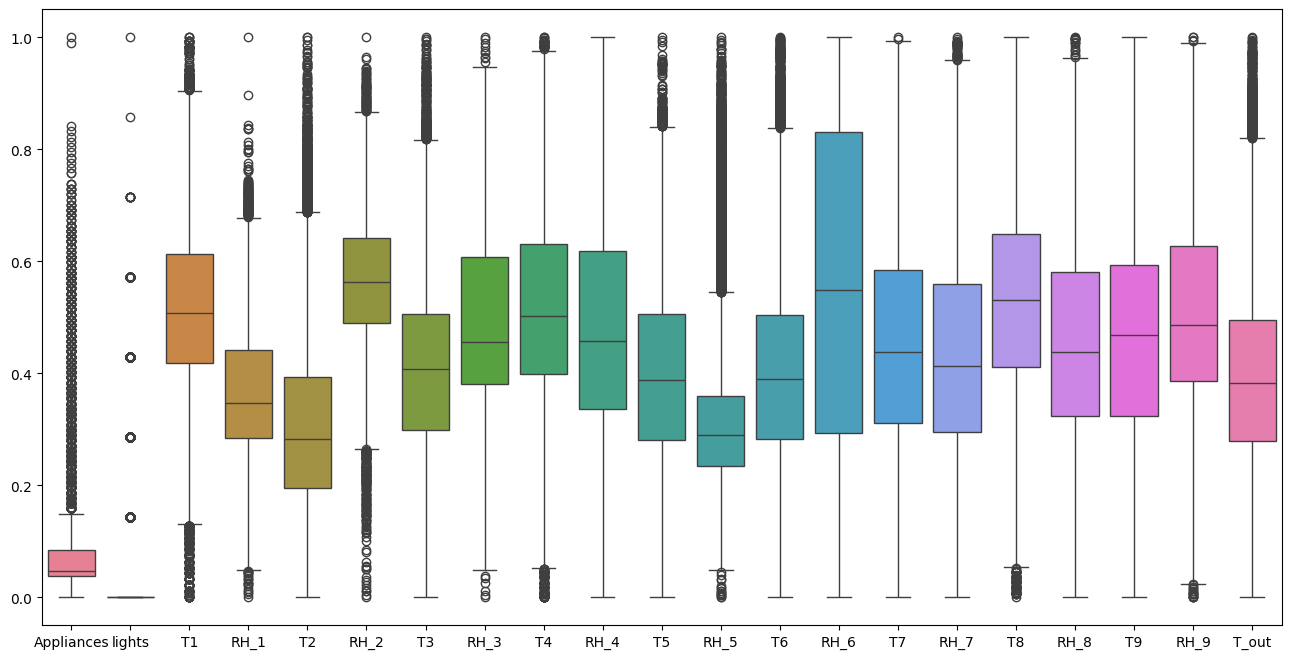

In [9]:
#Ver el preprocesado final
fig = plt.figure(figsize=(16,8))
sns.boxplot(data=df)
plt.show()

In [10]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,0.081958,0.054312,0.517061,0.364271,0.308303,0.561170,0.421038,0.489601,0.518499,0.485143,...,0.317777,0.406809,0.542053,0.459671,0.432206,0.523873,0.457031,0.478234,0.512655,0.399089
std,0.095818,0.113371,0.169595,0.109512,0.159412,0.114438,0.166676,0.152107,0.184044,0.185289,...,0.135656,0.177277,0.314963,0.198868,0.181355,0.179081,0.179039,0.209647,0.171833,0.170978
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.037383,0.000000,0.419219,0.283735,0.195542,0.490299,0.298272,0.380122,0.399099,0.335894,...,0.234337,0.282104,0.293478,0.311970,0.294326,0.410436,0.324423,0.323621,0.386313,0.278671
50%,0.046729,0.000000,0.507920,0.347675,0.283499,0.563408,0.407112,0.456302,0.501502,0.458387,...,0.289821,0.389026,0.548938,0.437637,0.413593,0.530363,0.437800,0.468262,0.485651,0.383173
75%,0.084112,0.000000,0.613516,0.441519,0.392537,0.641016,0.505982,0.607260,0.630631,0.618722,...,0.358586,0.504177,0.831412,0.585297,0.560284,0.648459,0.580398,0.594173,0.627956,0.495445
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
